In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(3).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-3 in yolov8:: 100%|██████████| 19974/19974 [00:02<00:00, 7888.70it/s]


In [4]:
yolo8_model_detection =YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 292MB/s]


In [5]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-3 datasets/sixray100-1

In [6]:
try:
    yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=16, project='YOLO_weights',name='SIXray_Output',exist_ok=True, device = [0,1])
except:
    os.makedirs('datasets',exist_ok = True)

!cp -r /kaggle/working/PIDRAY-3 datasets/sixray100-1
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=100, imgsz=640, batch=16, project='YOLO_weights',name='SIXray_Output',exist_ok=True, device = [0,1])

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1], workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]
2024-01-18 21:40:08,909	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-18 21:40:09,400	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorBoard: Start with 'tensorboard --logdir YOLO_weights/SIXray_Output', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=10
Transferred 589/595 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 71.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels... 7741 images, 1258 backgrounds, 0 corrupt: 100%|██████████| 7741/7741 [00:06<00:00, 1285.96it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels... 611 images, 25 backgrounds, 0 corrupt:  40%|███▉      | 611/1537 [00:00<00:00, 1194.19it/s]/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1213.90it/s]


val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.08G      1.155      2.696      1.451         11        640: 100%|██████████| 484/484 [05:24<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:38<00:00,  2.50it/s]


                   all       1537       1627      0.681      0.411      0.459      0.347

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.36G       1.08      1.491      1.344         14        640: 100%|██████████| 484/484 [05:17<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627       0.65      0.455       0.47      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.35G      1.247       1.67      1.458         17        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.59it/s]


                   all       1537       1627      0.593      0.282      0.335      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.39G      1.409      1.862      1.592         12        640: 100%|██████████| 484/484 [05:15<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.585      0.269      0.308      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.42G       1.37       1.72      1.558         13        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.617      0.355      0.392      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.41G      1.318      1.612       1.53         22        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.59it/s]


                   all       1537       1627       0.74       0.37      0.436      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.44G      1.236       1.46      1.473         12        640: 100%|██████████| 484/484 [05:15<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627       0.54      0.433      0.459      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.45G      1.196      1.373      1.439         16        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.623      0.422      0.514      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.45G      1.155      1.305      1.413         11        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.608      0.526      0.513      0.389

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.47G      1.123      1.267      1.386         10        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.843      0.527      0.574      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.43G        1.1      1.195      1.369         13        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.816      0.509      0.586      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.43G      1.079       1.15       1.34         15        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.772       0.52      0.565      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.41G      1.038      1.093      1.316         11        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.663        0.6      0.617      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.43G      1.026      1.053      1.307         18        640: 100%|██████████| 484/484 [05:14<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.838      0.545      0.605      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.41G      1.007      1.031      1.293          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.849      0.554        0.6      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.43G     0.9785     0.9873      1.263         22        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.821      0.547      0.606      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.41G      0.971     0.9514      1.261         11        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.726      0.636      0.642      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.44G     0.9704     0.9687      1.271          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.802      0.588      0.647      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.46G     0.9483     0.9203      1.249         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.838      0.554      0.627      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.43G     0.9378     0.8934      1.236         16        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627       0.91      0.579      0.656      0.549

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.43G     0.9075     0.8803      1.213          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.882      0.587      0.671      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.39G     0.9061     0.8563      1.214          9        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.837      0.617      0.682      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       7.4G     0.8914      0.847      1.206         19        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.783      0.606      0.632      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.41G     0.8705     0.8186      1.198         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.862      0.587      0.669      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       7.4G     0.8903     0.8368      1.207         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.918      0.561      0.673      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.43G      0.852     0.7781      1.173         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.779      0.644      0.679      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.43G     0.8402     0.7728       1.18         13        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.913      0.628      0.717      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.44G     0.8494     0.7849      1.169         21        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.889      0.602      0.705      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.42G     0.8438     0.7515      1.171         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.796      0.635      0.698      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.41G      0.814     0.7227      1.143         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.873      0.665      0.715      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.41G     0.8285      0.748       1.16          5        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.796      0.638      0.723        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.43G     0.8065     0.7218      1.143         12        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.864      0.628      0.714      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.39G     0.8181     0.7221      1.155         12        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.59it/s]


                   all       1537       1627       0.82      0.658      0.701       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.39G     0.8099     0.6945      1.135         13        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.91      0.631      0.711      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.41G     0.8061     0.6997      1.138         12        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.681      0.765      0.764      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.41G      0.782     0.6686      1.118          6        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.849      0.653      0.712      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.43G     0.7753     0.6795      1.131         10        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.888      0.677      0.753      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.42G      0.766     0.6621      1.113         13        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.829      0.719      0.763       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.42G      0.761     0.6526      1.106         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.849      0.673      0.756      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.43G     0.7569      0.647      1.112         21        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.726      0.653      0.689      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.46G     0.7454      0.644      1.107          9        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.929      0.639      0.775      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.43G     0.7462     0.6312      1.106         13        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.777       0.69      0.749      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.43G     0.7265     0.6159      1.094         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.804      0.743      0.774       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.45G     0.7307     0.6183        1.1         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.783      0.758      0.777      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.43G     0.7196     0.6035      1.093         19        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.866      0.675      0.753      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.44G     0.7095     0.5942      1.079         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.866       0.66      0.774      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.44G     0.7199     0.5977      1.078         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.859       0.68      0.772      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.43G     0.7058     0.5872      1.071          9        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.715      0.712       0.79      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.43G     0.7095     0.5805      1.078         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.829      0.693      0.779      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.42G      0.713      0.584      1.081         13        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.814      0.737      0.769      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.44G     0.6974       0.57      1.073          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.782      0.752      0.795      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.44G      0.689     0.5649      1.066         16        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.758      0.739      0.774      0.653

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.43G     0.6725     0.5539      1.056         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.841      0.703       0.78      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.42G     0.6838     0.5603      1.057         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.733      0.762      0.799      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.41G     0.6786     0.5412      1.063         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.863      0.682      0.771      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.42G     0.6632     0.5356      1.052         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.877      0.702      0.782      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.41G     0.6574     0.5267       1.05         11        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.82      0.752      0.824      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.43G     0.6594     0.5236       1.05         11        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.77      0.785      0.817      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.42G     0.6527     0.5144      1.045         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.724      0.795      0.803      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.41G     0.6524     0.5105      1.039         15        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.765      0.718      0.757      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.42G     0.6356     0.4991      1.034         14        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.832      0.686      0.768      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.44G     0.6383     0.4972      1.038         14        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.908      0.692      0.804      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.44G     0.6386     0.4955      1.041         20        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.908      0.722      0.789      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.43G     0.6243     0.4921       1.03         10        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.866      0.719       0.79      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.43G     0.6307      0.493      1.028         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.766      0.786      0.783       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.41G      0.612     0.4731      1.015         20        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.877      0.716      0.784      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.42G     0.6176     0.4725      1.022         17        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.733      0.791      0.815      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.43G     0.6152      0.474      1.017         14        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.716      0.764      0.821      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.44G     0.6056     0.4672       1.02         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.817      0.722      0.786      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.42G     0.6067     0.4587      1.015         10        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627      0.781      0.754      0.812       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.43G      0.592      0.452       1.01         15        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.871       0.71      0.811      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.42G     0.5909     0.4582      1.006         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.848      0.754      0.845      0.703

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.41G     0.5823     0.4435     0.9989         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.782      0.777      0.822      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.43G     0.5818     0.4443      1.003         16        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.854      0.756      0.833        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.42G     0.5758     0.4214     0.9914         15        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.879      0.777      0.851      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.43G     0.5732     0.4284     0.9922         13        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.88       0.77      0.854      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.43G     0.5602     0.4182     0.9877         16        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.809      0.791      0.855      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.44G      0.557     0.4176     0.9897         17        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.758      0.761      0.822      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.47G     0.5627     0.4239     0.9896          9        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.787      0.769      0.808      0.689

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.44G      0.551     0.4087     0.9872         15        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.825      0.765      0.822      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.45G     0.5494     0.4105     0.9831         15        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627       0.83      0.786       0.83      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.45G     0.5461     0.3977     0.9771          9        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.858      0.774      0.835      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.41G     0.5373     0.3951     0.9808         11        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.878      0.757      0.804      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.45G     0.5285     0.3939     0.9754          9        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.895      0.747      0.817      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.44G      0.527     0.3826     0.9726         18        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.62it/s]


                   all       1537       1627       0.88      0.756      0.824      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       7.4G     0.5353     0.3867      0.981         12        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.862      0.777      0.836      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.45G     0.5182     0.3755     0.9692         10        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.846      0.781      0.836      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.42G     0.5121     0.3719     0.9661         14        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.847      0.781      0.828      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.44G     0.5107     0.3668     0.9626         10        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.874      0.779      0.827      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       7.4G     0.5108     0.3775     0.9667         17        640: 100%|██████████| 484/484 [05:16<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.897      0.768      0.833      0.711
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.43G     0.3961     0.2375     0.8763          9        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.827      0.778      0.828      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.42G      0.392     0.2307     0.8712          9        640: 100%|██████████| 484/484 [05:15<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.83      0.781      0.831      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.42G     0.3904     0.2328     0.8753          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.824      0.762      0.825      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.43G     0.3721     0.2219     0.8694          5        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.59it/s]


                   all       1537       1627      0.738      0.816       0.82      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.44G     0.3723     0.2219     0.8656          8        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.849      0.768      0.832      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.42G     0.3635     0.2155     0.8624          5        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.853      0.765      0.832      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.41G      0.359     0.2123     0.8596          6        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627      0.854      0.765      0.831      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.41G     0.3527     0.2057     0.8566          6        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.61it/s]


                   all       1537       1627       0.84      0.757      0.828      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.41G       0.36     0.2083     0.8591          9        640: 100%|██████████| 484/484 [05:15<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.837      0.758      0.831      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.39G     0.3488     0.2012     0.8567          7        640: 100%|██████████| 484/484 [05:15<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:37<00:00,  2.60it/s]


                   all       1537       1627      0.839      0.758       0.83      0.699

100 epochs completed in 9.888 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 136.7MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 136.7MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [00:39<00:00,  2.47it/s]


                   all       1537       1627      0.846      0.781      0.836      0.724
                 Baton       1537          4          1      0.475      0.589      0.418
                Bullet       1537          9      0.695      0.222       0.44      0.293
                   Gun       1537         17      0.466      0.765      0.763      0.706
                Hammer       1537        960      0.998      0.983      0.995      0.975
             HandCuffs       1537         13      0.863      0.968      0.986       0.88
                 Knife       1537         13      0.809      0.769      0.841       0.73
               Lighter       1537         16      0.818       0.75      0.796      0.626
                Pliers       1537        375      0.973      0.955      0.989      0.907
             Powerbank       1537         49      0.901       0.98      0.989      0.856
              Scissors       1537        171       0.94      0.947      0.973      0.853
Speed: 0.2ms preproce

In [7]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
                                                     CUDA:1 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68133198 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [01:24<00:00,  1.15it/s]


                   all       1537       1627      0.846      0.781      0.836      0.725
                 Baton       1537          4          1      0.475      0.589      0.418
                Bullet       1537          9      0.696      0.222       0.44      0.293
                   Gun       1537         17      0.466      0.765      0.764        0.7
                Hammer       1537        960      0.998      0.983      0.995      0.975
             HandCuffs       1537         13      0.863      0.967      0.986      0.873
                 Knife       1537         13      0.809      0.769       0.84      0.728
               Lighter       1537         16      0.819       0.75      0.796      0.652
                Pliers       1537        375      0.973      0.955      0.989      0.907
             Powerbank       1537         49      0.901       0.98      0.989      0.855
              Scissors       1537        171      0.941      0.947      0.973      0.853
Speed: 0.3ms preproce

array([    0.41821,     0.29315,     0.69956,     0.97502,     0.87261,      0.7282,     0.65246,     0.90665,     0.85525,     0.85302])


image 1/703 /kaggle/working/PIDRAY-3/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 107.3ms
image 2/703 /kaggle/working/PIDRAY-3/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 1 Hammer, 71.0ms
image 3/703 /kaggle/working/PIDRAY-3/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 1 Hammer, 91.5ms
image 4/703 /kaggle/working/PIDRAY-3/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 1 Hammer, 40.7ms
image 5/703 /kaggle/working/PIDRAY-3/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 1 Hammer, 90.6ms
image 6/703 /kaggle/working/PIDRAY-3/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 1 HandCuffs, 1 Powerbank, 95.7ms
image 7/703 /kaggle/working/PIDRAY-3/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640 1 Hammer, 37.6ms
image 8/703 /kaggle/working/PIDRAY-3/test/images/xray_23894_png.rf.2f66e

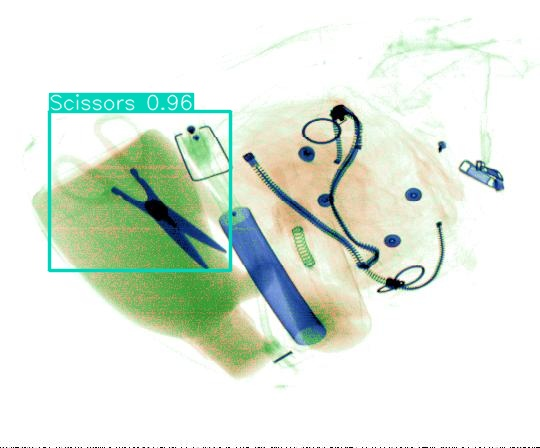

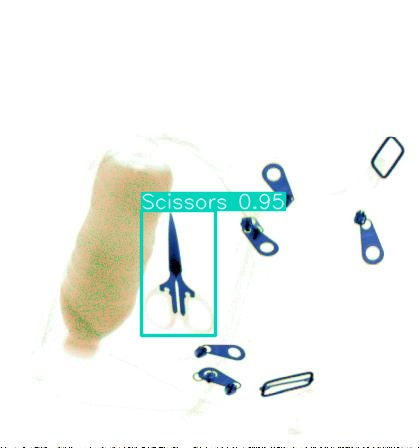

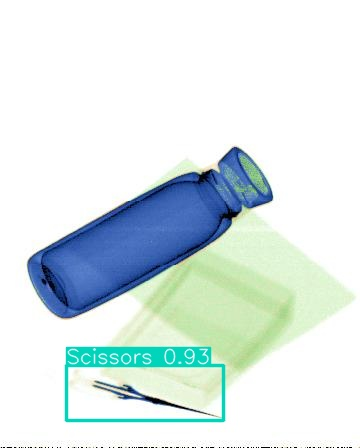

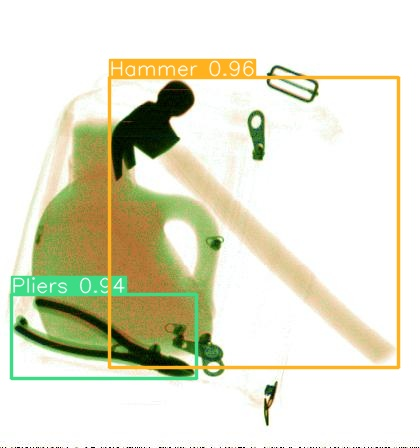

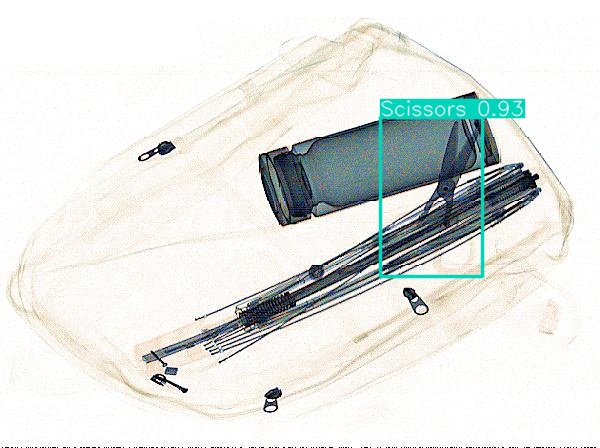

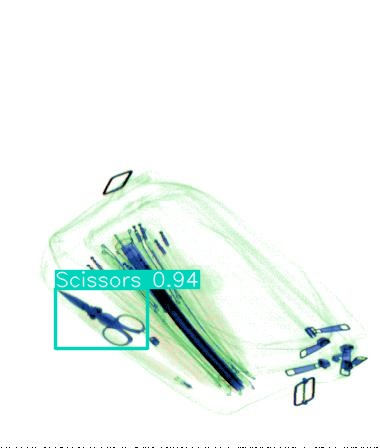

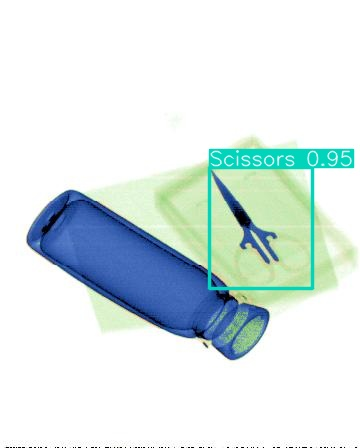

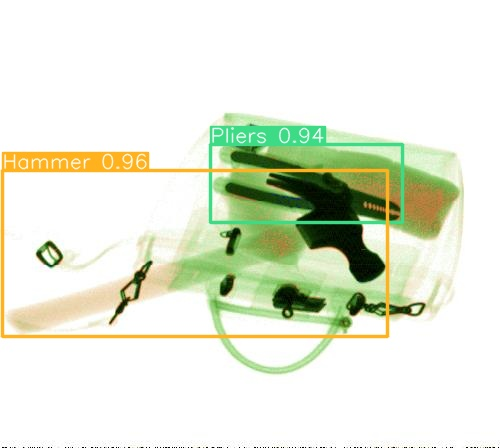

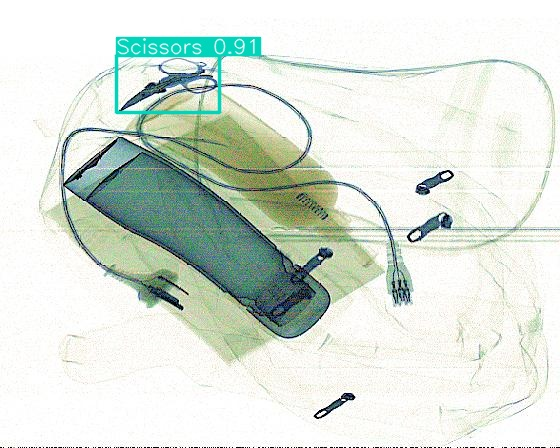

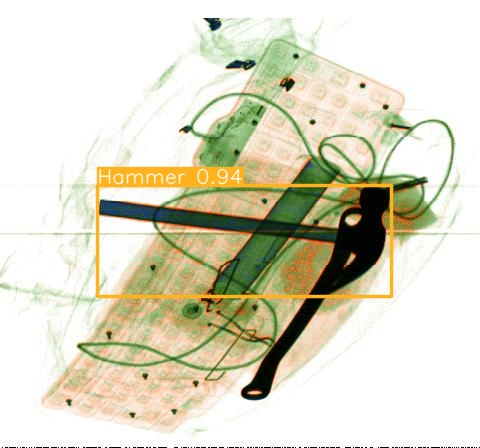

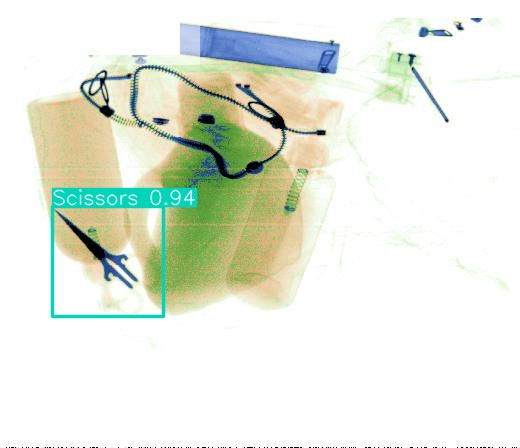

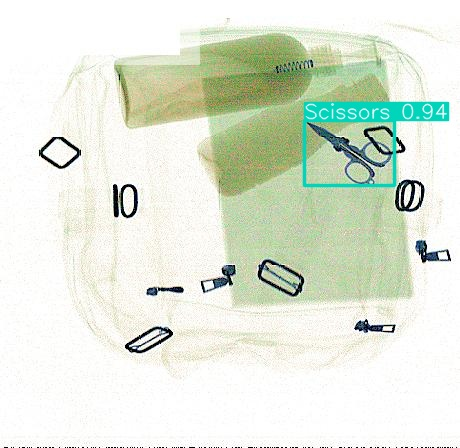

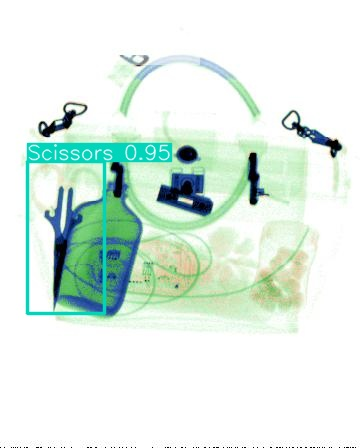

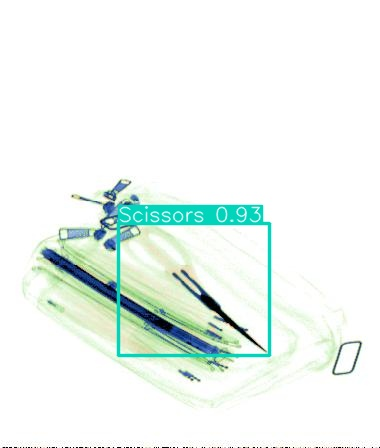

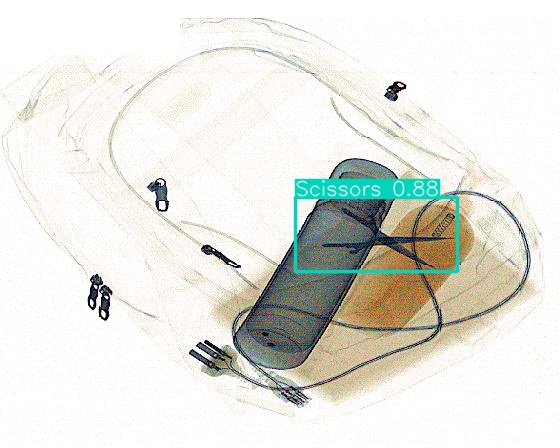

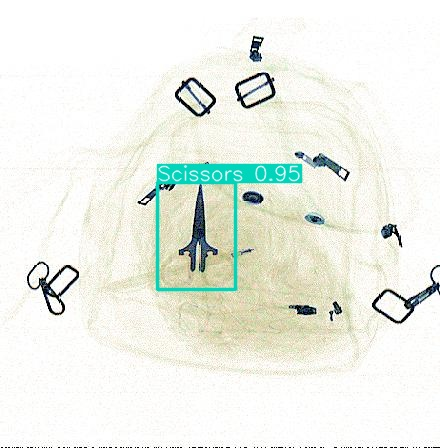

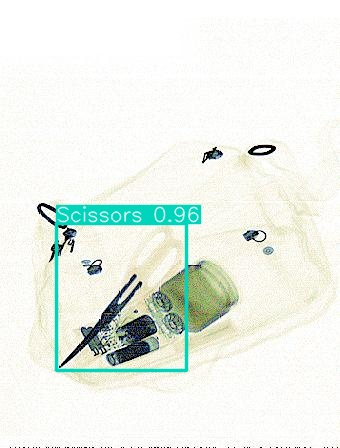

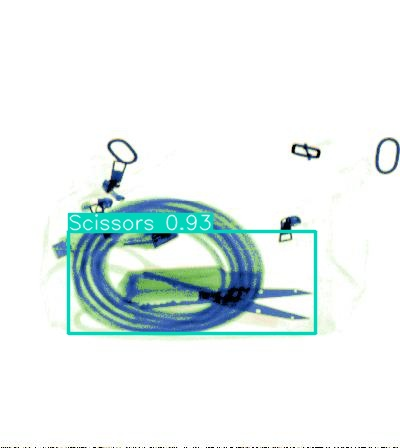

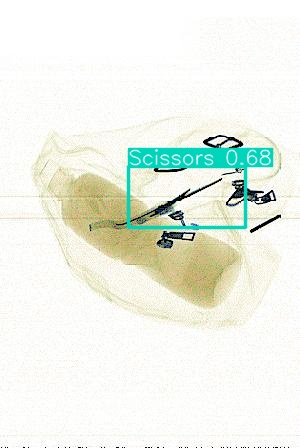

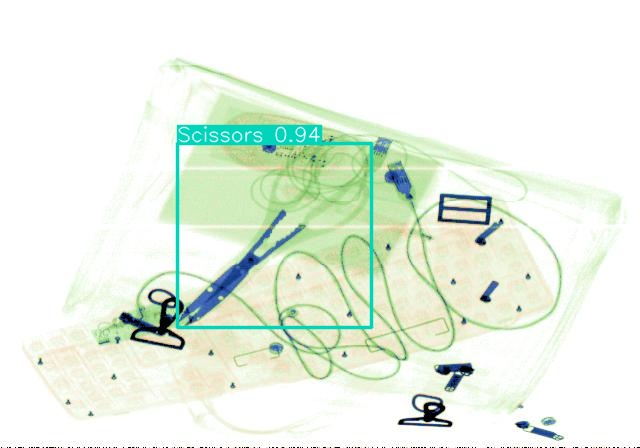

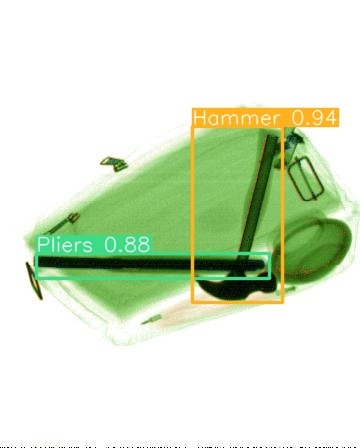

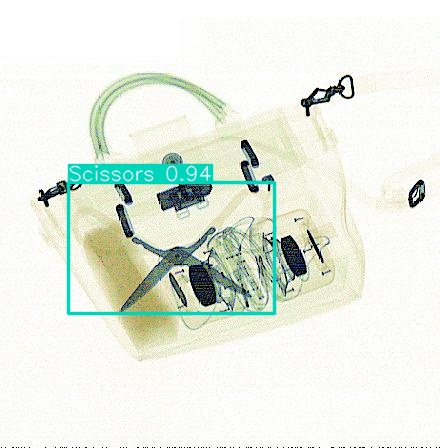

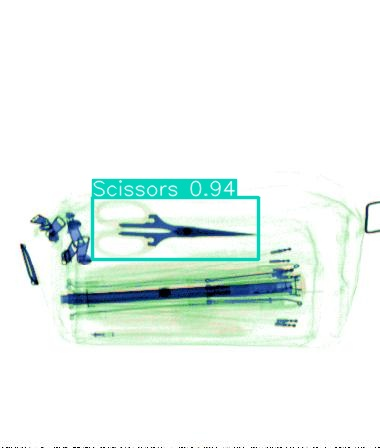

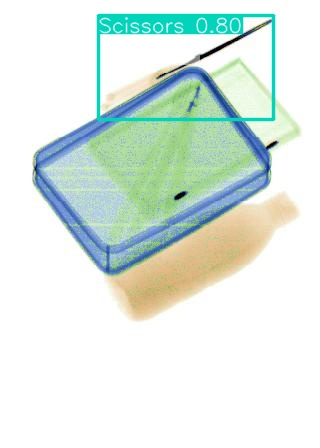

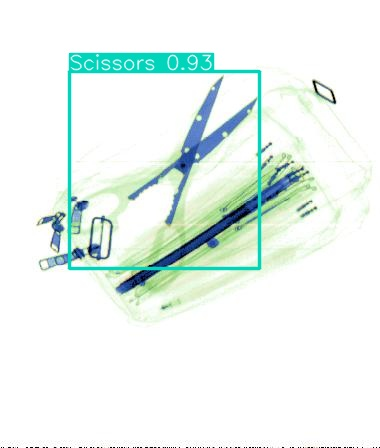

In [8]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/PIDRAY-3/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

In [9]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (3917.84s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅      130.4               0.7236                   60.84
1             TorchScript       ✅      260.5               0.7232                   62.86
2                    ONNX       ✅      260.1               0.7232                   70.22
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎      366.0                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅      650.5               0.7232                   81.34
7     TensorFlow GraphDef       ✅      260.2               0.7232                   84.75
8         TensorFlow 

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,130.4,0.7236,60.84
1,TorchScript,✅,260.5,0.7232,62.86
2,ONNX,✅,260.1,0.7232,70.22
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,366.0,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,650.5,0.7232,81.34
7,TensorFlow GraphDef,✅,260.2,0.7232,84.75
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
